Build the linear regression model using scikit learn for boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [44]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Target'] = boston.target
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Exploratory Data Analysis

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [45]:
# Check for missing values
df.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Target     False
dtype: bool

In [46]:
# Let's see how many NaN values are there
df['INDUS'].isna().value_counts()

False    506
Name: INDUS, dtype: int64

In [10]:
### So, we have no NaN values

In [8]:
# Let's check the data types of each feature
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Target     float64
dtype: object

In [9]:
# Let's check the correlation among the independent features,
# and also between dependent and independent features.

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [13]:
### No serious correlation

In [10]:
# We have all the features as numerical. But they can be continuous or discrete
# Let's check

discrete_feature = []
continuous_feature = []

for feature in boston.feature_names:
    if len(df[feature].unique()) <= 26:     # considering feature having less than 26 unique values to be discrete
        discrete_feature.append(feature)
    else:
        continuous_feature.append(feature)

print('Discrete features: ', discrete_feature)
print('Continuous features: ',continuous_feature)

Discrete features:  ['ZN', 'CHAS', 'RAD']
Continuous features:  ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [11]:
# df[discrete_feature]
df[continuous_feature]

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

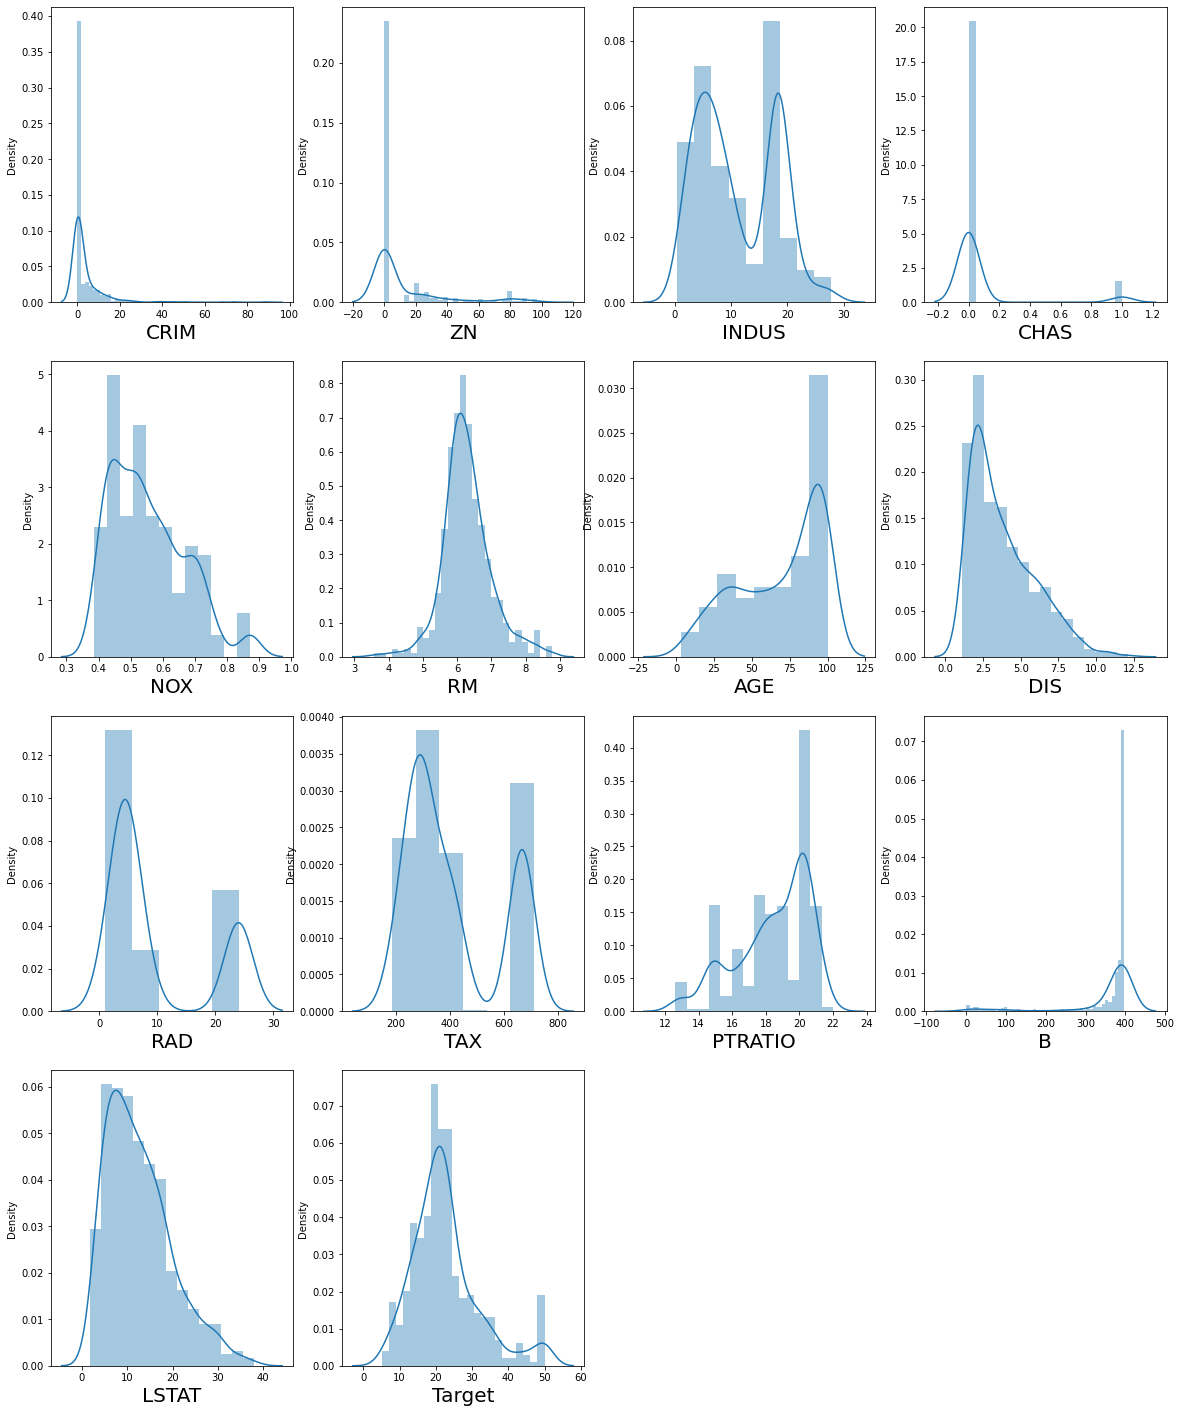

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=14 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1

<AxesSubplot:>

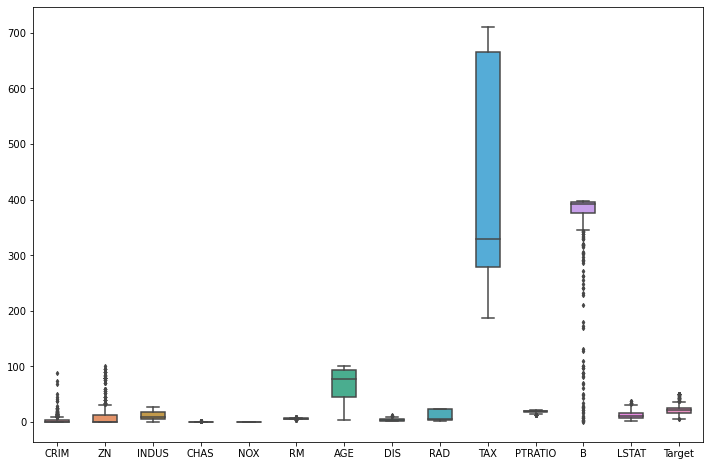

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

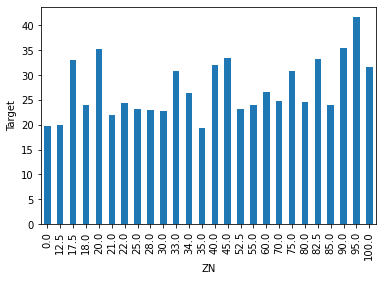

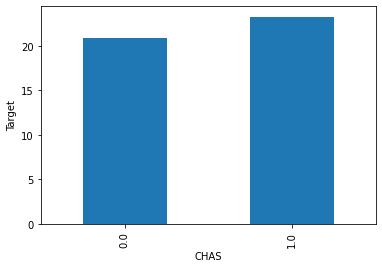

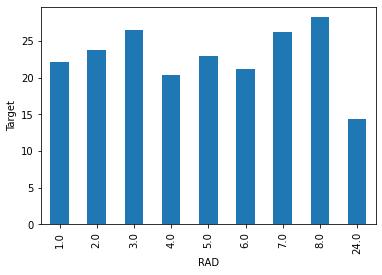

In [15]:
# Let's find the relationship between discrete features and the Target


# feature = discrete_feature[0]
# data.groupby(feature)['Target'].median()

for feature in discrete_feature:
    df.groupby(feature)['Target'].median().plot.bar()   # plotting meadian value target for each unique value of any feature.
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.show()


In [16]:
## Let's analyse continuous features now by understanding their distribution

In [17]:
import scipy.stats as stat
import pylab

In [18]:
#### To check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

    
### A function for all transformations (some errors can be encountered, subject to data )
def transformations(df,feature):
    try:
        print('log')
        df[feature+'log']=np.log(df[feature])   # log transformation
        plot_data(df,feature+'log')
    except Exception as e:
        print(e)
    
    try:
        print('reciprocal')
        df[feature+'reciprocal']=1/df[feature]   # reciprocal transformation
        plot_data(df,feature+'reciprocal')
    except Exception as e:
        print(e)
    
    try:
        print('square root')
        df[feature+'square root']=df[feature]**(1/2)   # square root transformation
        plot_data(df,feature+'square root')
    except Exception as e:
        print(e)
    
    try:
        print('exponential')
        df[feature+'exponential']=df[feature]**(1/1.2)   # exponential transformation
        plot_data(df,feature+'exponential')
    except Exception as e:
        print(e)
    
    try:
        print('boxcox')
        df[feature+'boxcox'],parameters=stat.boxcox(df[feature])  # BoxCox transformation
        plot_data(df,feature+'boxcox')
    except Exception as e:
        print(e)

In [19]:
continuous_feature

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [20]:
data = df.copy()

False
CRIM


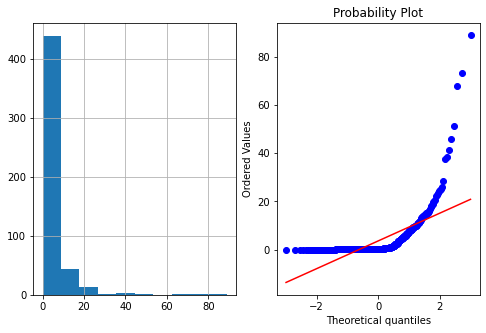

log


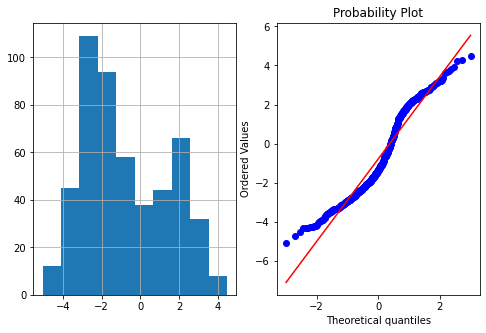

reciprocal


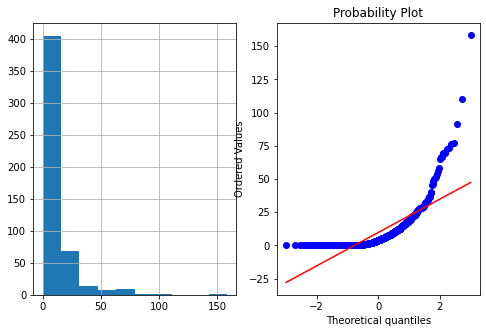

square root


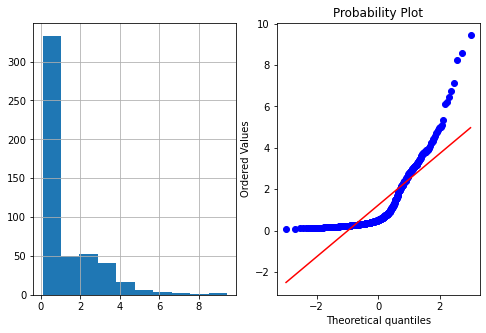

exponential


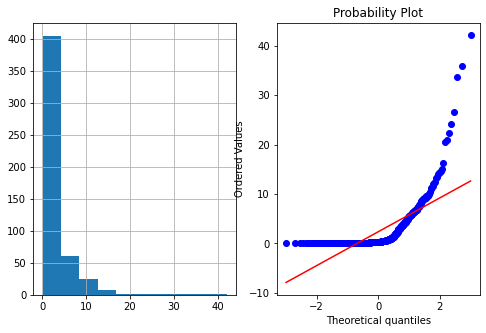

boxcox


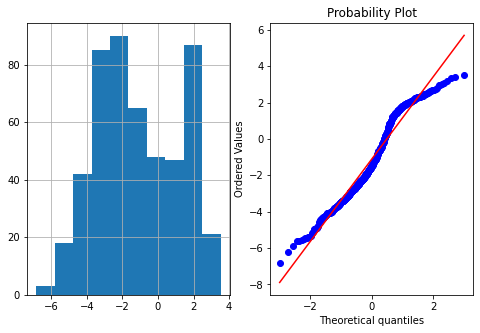

In [21]:
feature = continuous_feature[0]
print((data[feature]<0).any())

print(feature)
plot_data(data,feature)
transformations(data,feature)

In [22]:
### log and boxcox look good. log looks better

False
INDUS


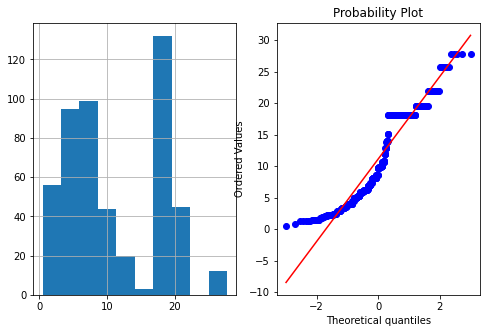

log


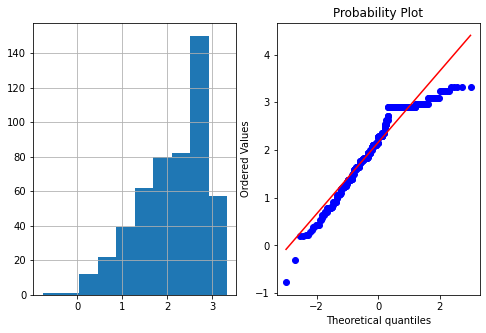

reciprocal


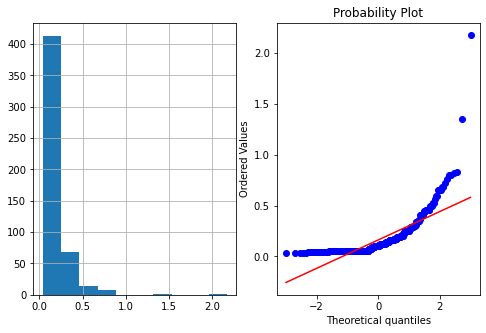

square root


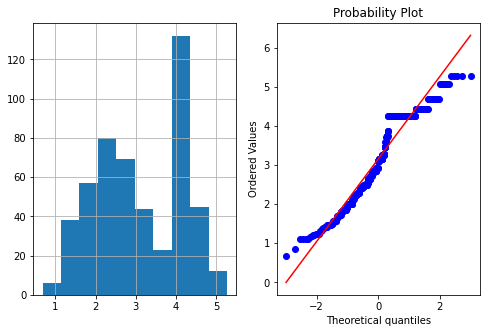

exponential


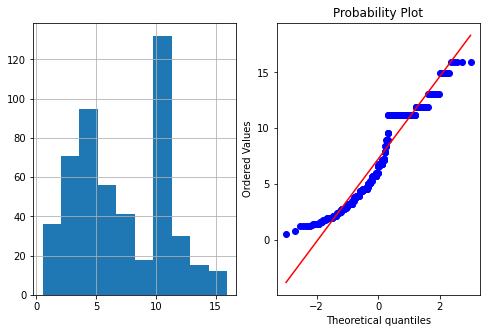

boxcox


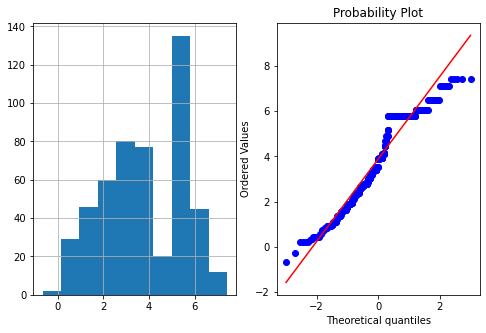

In [23]:
feature = continuous_feature[1]
print((data[feature]<0).any())

print(feature)
plot_data(data,feature)
transformations(data,feature)

In [30]:
### square root and boxcox looks good. Let's go with square root

False
NOX


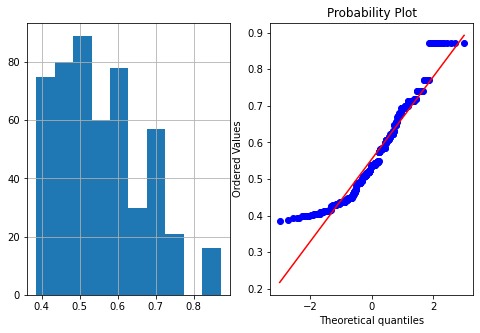

log


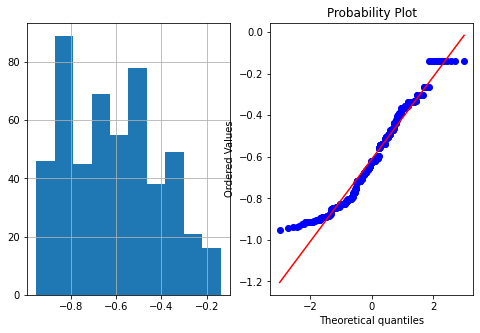

reciprocal


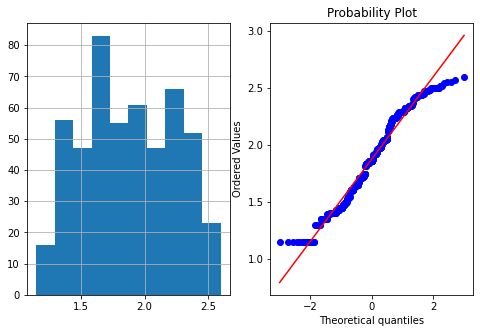

square root


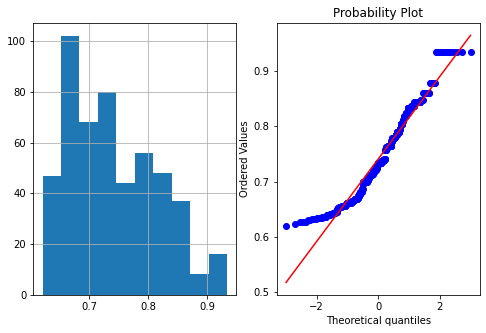

exponential


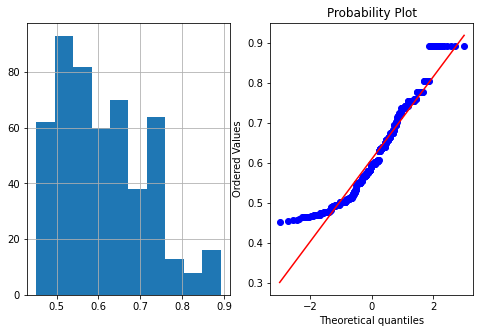

boxcox


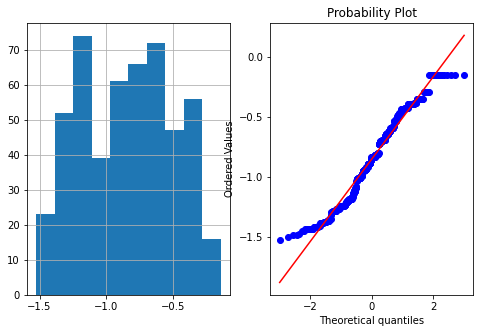

In [24]:
feature = continuous_feature[2]
print((data[feature]<0).any())

print(feature)
plot_data(data,feature)
transformations(data,feature)

In [25]:
### Reciprocal and boxcox seems working good for feature[2]
### Reciprocal is better

False
RM


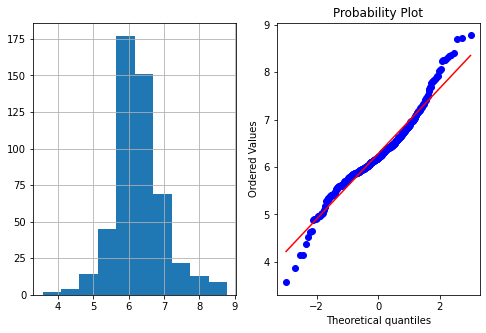

log


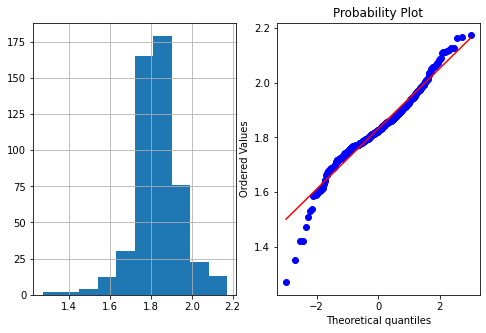

reciprocal


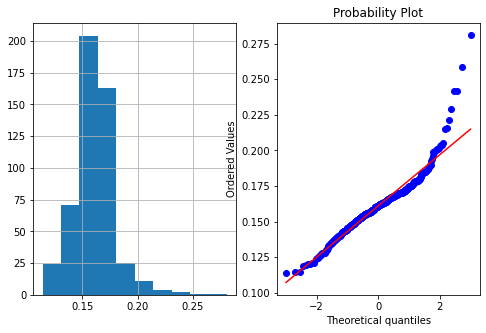

square root


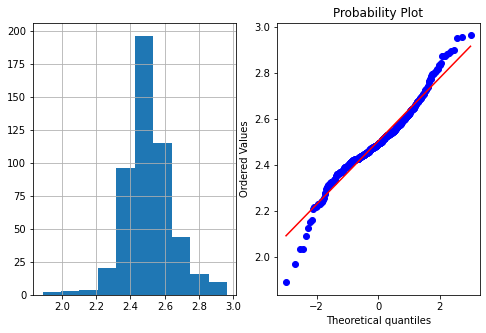

exponential


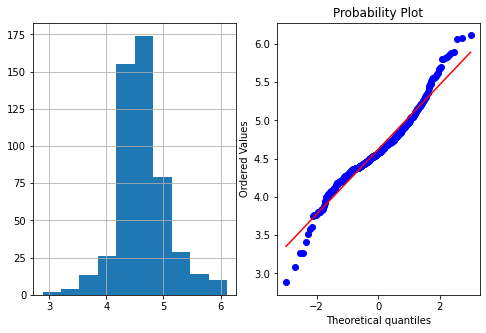

boxcox


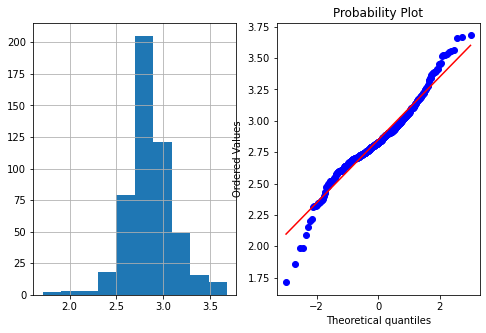

In [26]:
feature = continuous_feature[3]
print((data[feature]<0).any())

print(feature)
plot_data(data,feature)
transformations(data,feature)

In [27]:
### feature[3] looks good as it is.

False
AGE


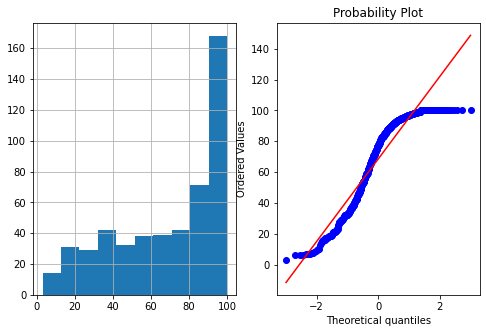

log


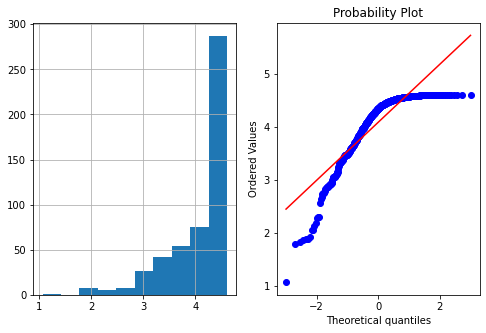

reciprocal


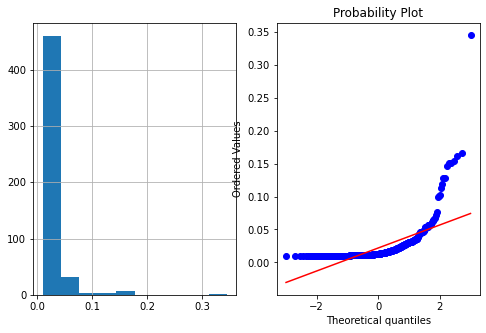

square root


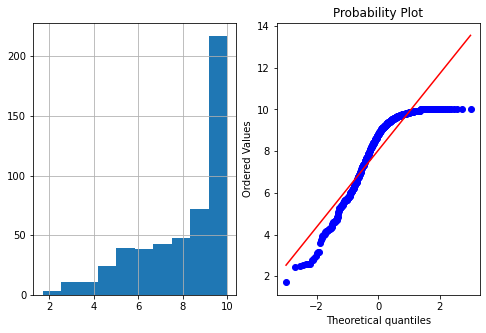

exponential


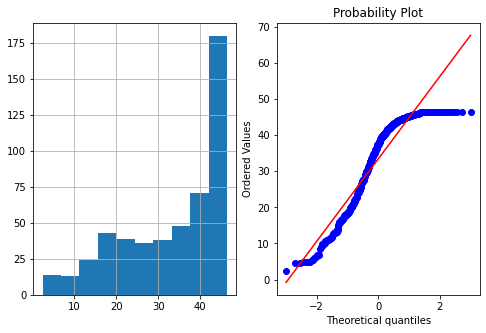

boxcox


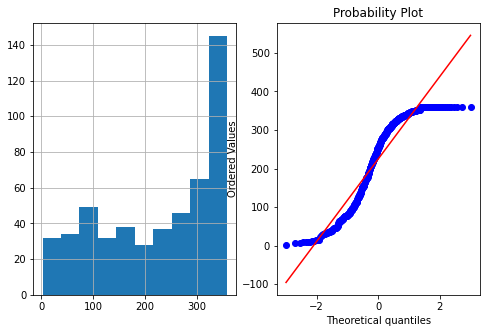

In [28]:
feature = continuous_feature[4]
print((data[feature]<0).any())

print(feature)
plot_data(data,feature)
transformations(data,feature)

In [29]:
### None of the transformations seem to be working much for feature[4]

False
DIS


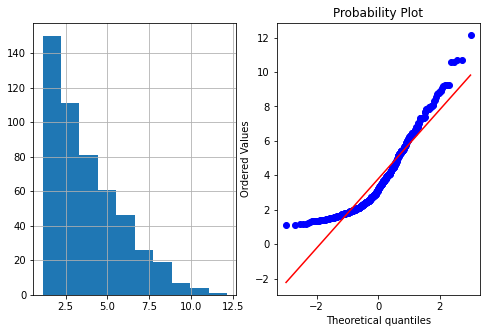

log


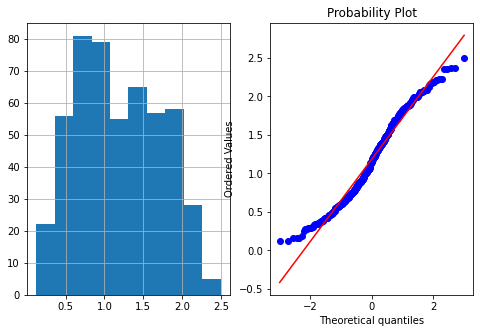

reciprocal


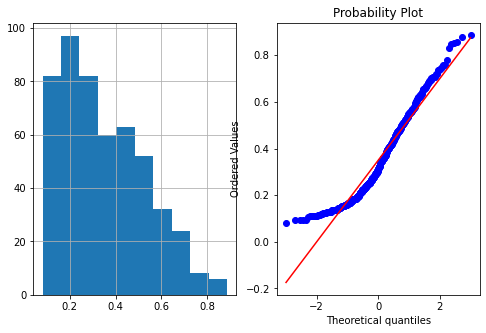

square root


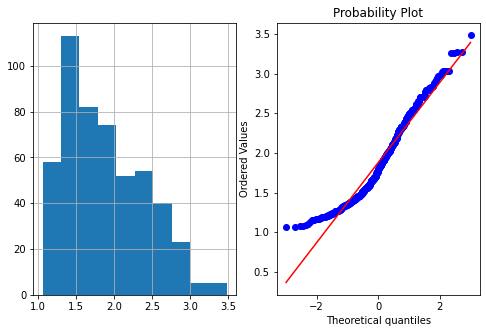

exponential


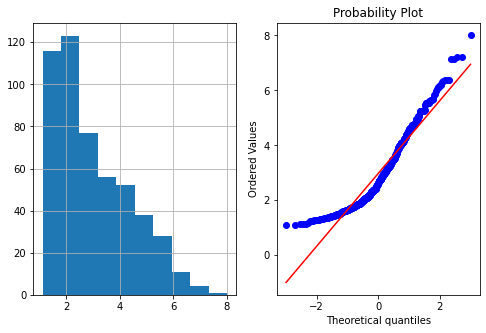

boxcox


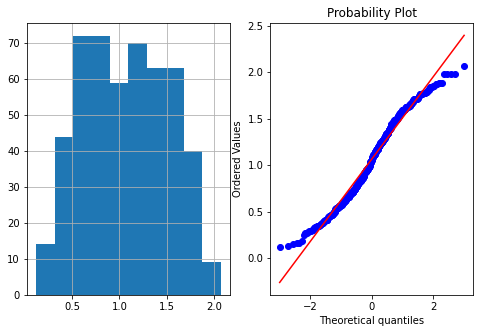

In [30]:
feature = continuous_feature[5]
print((data[feature]<0).any())

print(feature)
plot_data(data,feature)
transformations(data,feature)

In [31]:
### log and boxcox look good. boxcox looks better

False
TAX


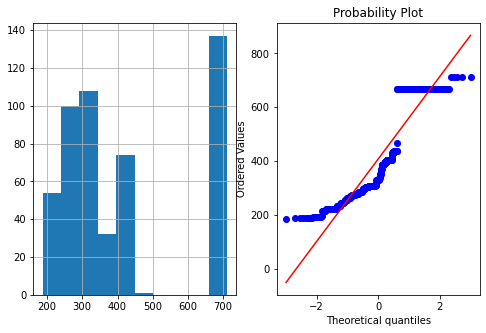

log


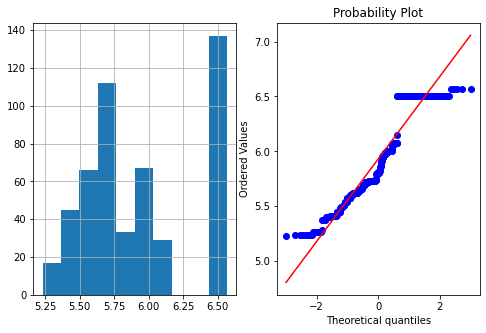

reciprocal


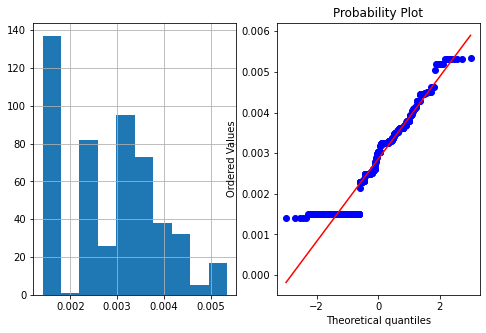

square root


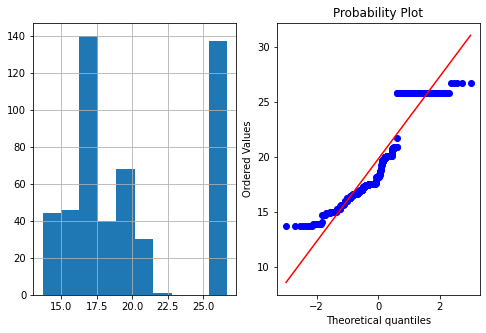

exponential


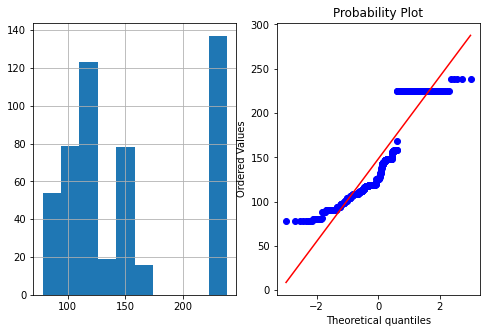

boxcox


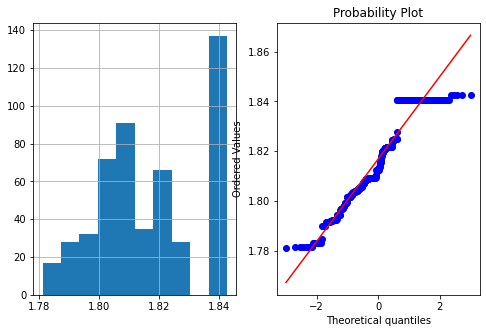

In [33]:
feature = continuous_feature[6]
print((data[feature]<0).any())

print(feature)
plot_data(data,feature)
transformations(data,feature)

In [34]:
# boxcox looks better for feature[6]

False
PTRATIO


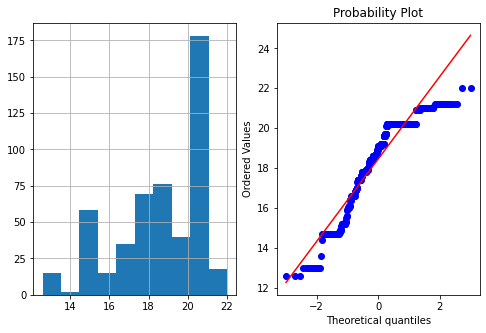

log


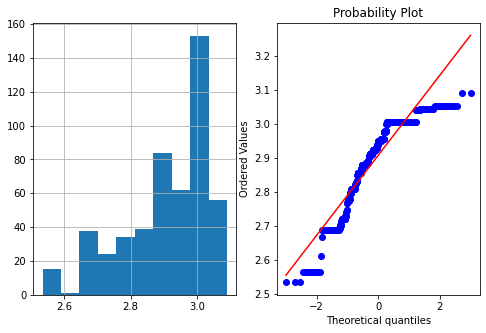

reciprocal


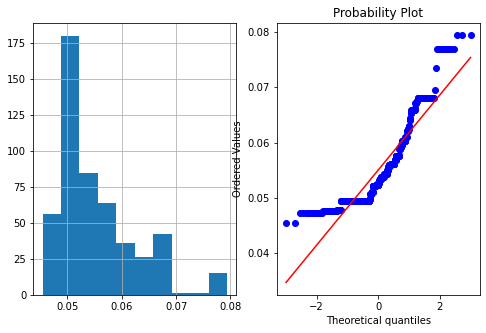

square root


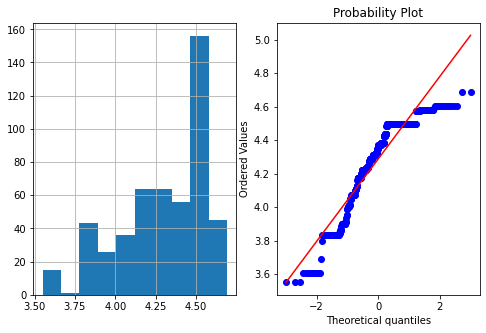

exponential


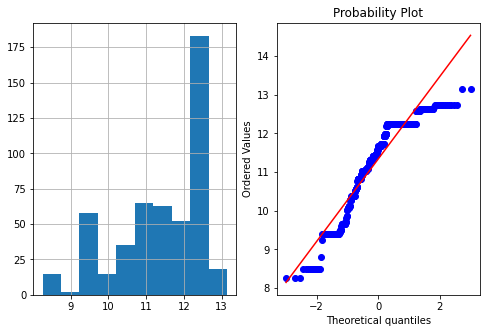

boxcox


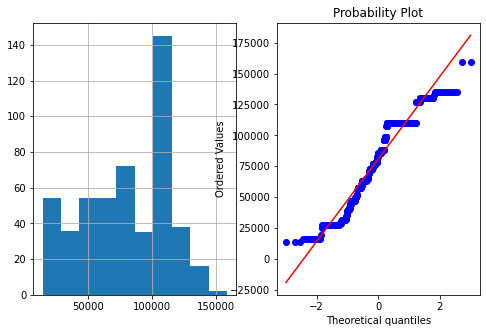

In [35]:
feature = continuous_feature[7]
print((data[feature]<0).any())

print(feature)
plot_data(data,feature)
transformations(data,feature)

In [42]:
### feature[7] looks good as it is

False
B


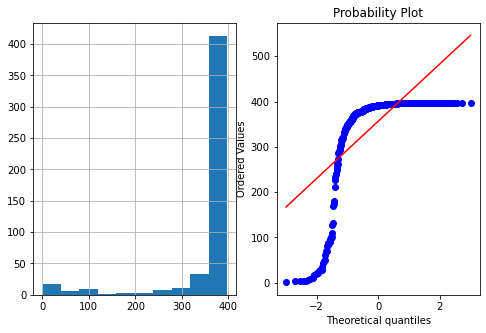

log


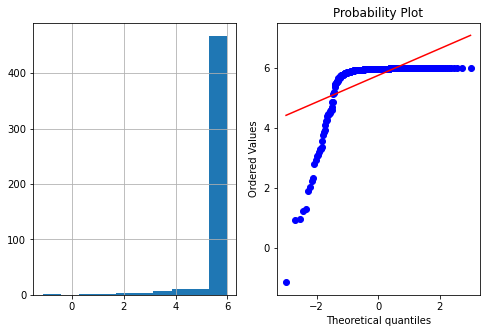

reciprocal


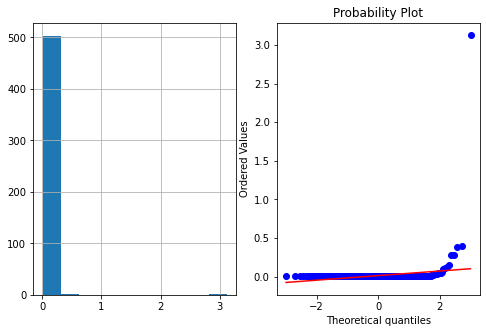

square root


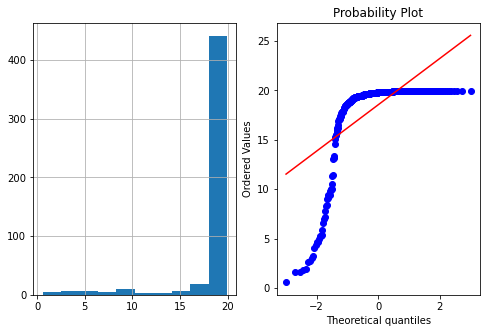

exponential


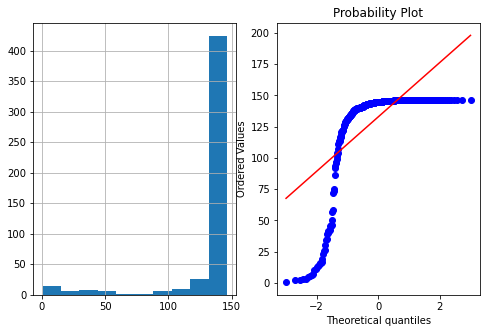

boxcox


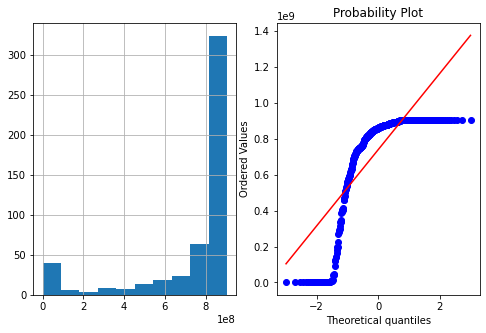

In [36]:
feature = continuous_feature[8]
print((data[feature]<0).any())

print(feature)
plot_data(data,feature)
transformations(data,feature)

In [37]:
### reciprocal transforamtion looks better for feature[8]

False
LSTAT


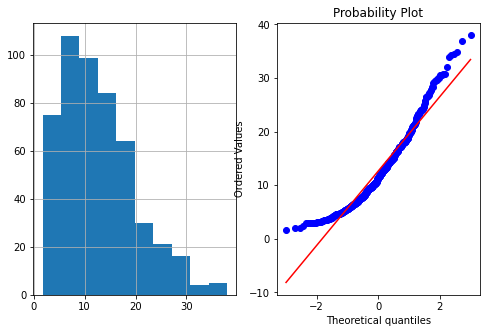

log


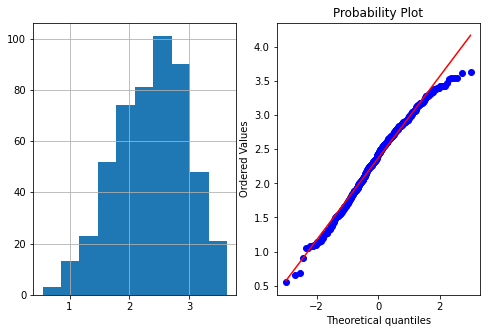

reciprocal


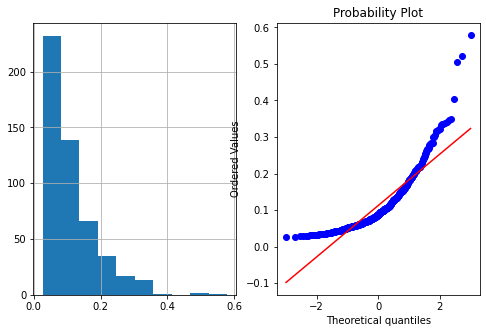

square root


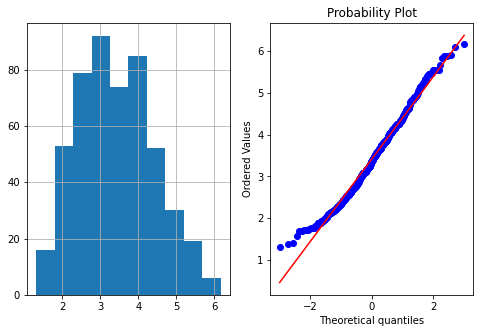

exponential


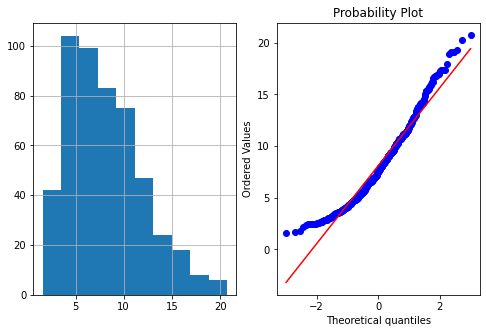

boxcox


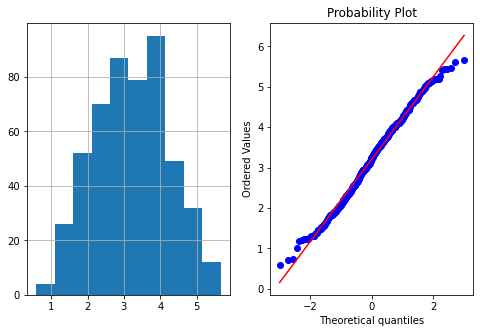

In [38]:
feature = continuous_feature[9]
print((data[feature]<0).any())

print(feature)
plot_data(data,feature)
transformations(data,feature)

In [39]:
### boxcox looks good for feature[9]

In [49]:
1/df['NOX']

0      1.858736
1      2.132196
2      2.132196
3      2.183406
4      2.183406
         ...   
501    1.745201
502    1.745201
503    1.745201
504    1.745201
505    1.745201
Name: NOX, Length: 506, dtype: float64

In [50]:
### Now, let's transform the features of our df accordingly

df['CRIM'] = np.log(df['CRIM'])   # [apply log]

df['INDUS'] = df['INDUS']**(1/2)     # [apply square root]

df['NOX'] = 1/df['NOX']

df['DIS'],_ = stat.boxcox(df['DIS'])    # [apply boxcox]

df['TAX'],_ = stat.boxcox(df['TAX'])     # [apply boxcox]

df['B'] = 1/df['B']

df['LSTAT'],_ = stat.boxcox(df['LSTAT'])    # [apply boxcox]

In [54]:
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,-5.064036,18.0,1.519868,0.0,1.858736,6.575,65.2,1.264870,1.0,1.807258,15.3,0.002520,1.938257,24.0
1,-3.600502,0.0,2.658947,0.0,2.132196,6.421,78.9,1.418585,2.0,1.796577,17.8,0.002520,2.876983,21.6
2,-3.601235,0.0,2.658947,0.0,2.132196,7.185,61.1,1.418585,2.0,1.796577,17.8,0.002546,1.640387,34.7
3,-3.430523,0.0,1.476482,0.0,2.183406,6.998,45.8,1.571460,3.0,1.791645,18.7,0.002534,1.222396,33.4
4,-2.672924,0.0,1.476482,0.0,2.183406,7.147,54.2,1.571460,3.0,1.791645,18.7,0.002520,2.036925,36.2


## Feature scaling

In [55]:
x_data = df.drop(['Target'],axis=1)
y_data = df['Target']

from sklearn.preprocessing import StandardScaler, RobustScaler

scalar = StandardScaler()
scaled_data = scalar.fit_transform(x_data)
scaled_data

robust = RobustScaler()
robust_data = robust.fit_transform(x_data)
robust_data

array([[-0.97390946,  1.44      , -0.80607524, ..., -1.33928571,
        -0.25072757, -0.85034824],
       [-0.58903311,  0.        , -0.22969199, ..., -0.44642857,
        -0.25072757, -0.23993319],
       [-0.58922576,  0.        , -0.22969199, ..., -0.44642857,
        -0.06449125, -1.04404034],
       ...,
       [-0.37873564,  0.        ,  0.17260282, ...,  0.69642857,
        -0.25072757, -0.73202449],
       [-0.22362774,  0.        ,  0.17260282, ...,  0.69642857,
        -0.09311017, -0.59600799],
       [-0.44397995,  0.        ,  0.17260282, ...,  0.69642857,
        -0.25072757, -0.39692578]])

## Model Building

In [58]:
print(robust_data.shape)
print(scaled_data.shape)

(506, 13)
(506, 13)


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(robust_data,y_data, test_size= 0.25, random_state = 355)

In [60]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
model_lr = LinearRegression()
model_lasso = Lasso()
model_ridge = Ridge()

model_lr.fit(x_train,y_train)
model_lasso.fit(x_train,y_train)
model_ridge.fit(x_train,y_train)

Ridge()

In [61]:
from sklearn.metrics import r2_score

y_pred_lr = model_lr.predict(x_test)
y_pred_lasso = model_lasso.predict(x_test)
y_pred_ridge = model_ridge.predict(x_test)

print('Linear Regression: ', r2_score(y_test,y_pred_lr))
print('Lasso: ', r2_score(y_test,y_pred_lasso))
print('Ridge: ', r2_score(y_test,y_pred_ridge))

Linear Regression:  0.7872499920746873
Lasso:  0.6923847704390209
Ridge:  0.7877690509124151


In [62]:
# # saving model to local system
# import pickle

# filename = 'boston_model.pickle'
# pickle.dump(lr, open(filename,'wb'))

In [63]:
# # prediction using the saved model
# loaded_model = pickle.load(open(filename,'rb'))
# y_pred = loaded_model.predict(x_test)